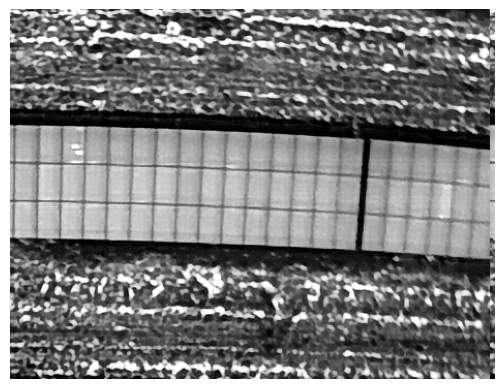

In [149]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# plt.rcParams['figure.figsize'] = [15, 10]

# Load the image using OpenCV
gray = cv2.imread('img/img7c.JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
#invert 
gray = cv2.bitwise_not(gray)

def showimg(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

showimg(gray)

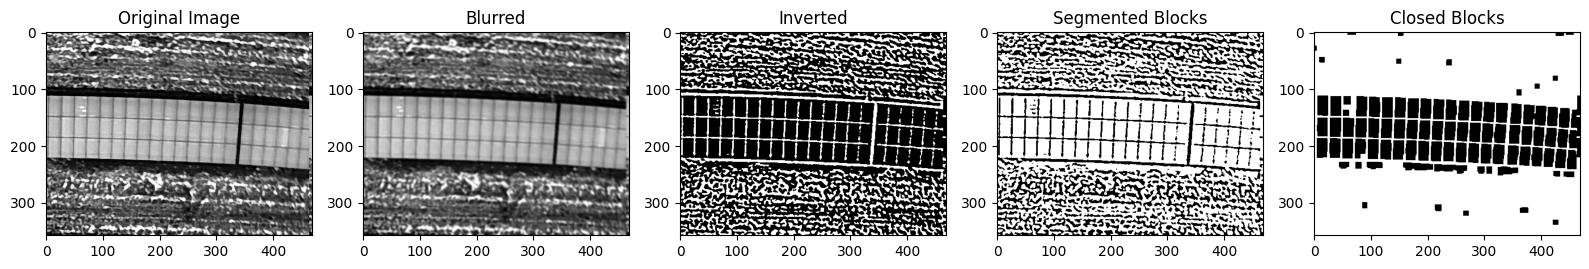

In [150]:
# threshold the image using neighborhood mean
blurks = 5
blurred = cv2.GaussianBlur(gray, (blurks, blurks), 0)

atks = 17
atoff = 10
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    atks,
    atoff
)
inverted = cv2.bitwise_not(thresh)
# Perform morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
closed = cv2.morphologyEx(inverted, cv2.MORPH_CLOSE, kernel)

# Plot the results
plt.figure(figsize=(16, 8))
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 2)
plt.title("Blurred")
plt.imshow(blurred, cmap='gray')

plt.subplot(1, 5, 3)
plt.title("Inverted")
plt.imshow(cv2.cvtColor(inverted, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 4)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 5)
plt.title("Closed Blocks")
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

[[[421 331]]

 [[421 339]]

 [[430 339]]

 [[430 331]]]


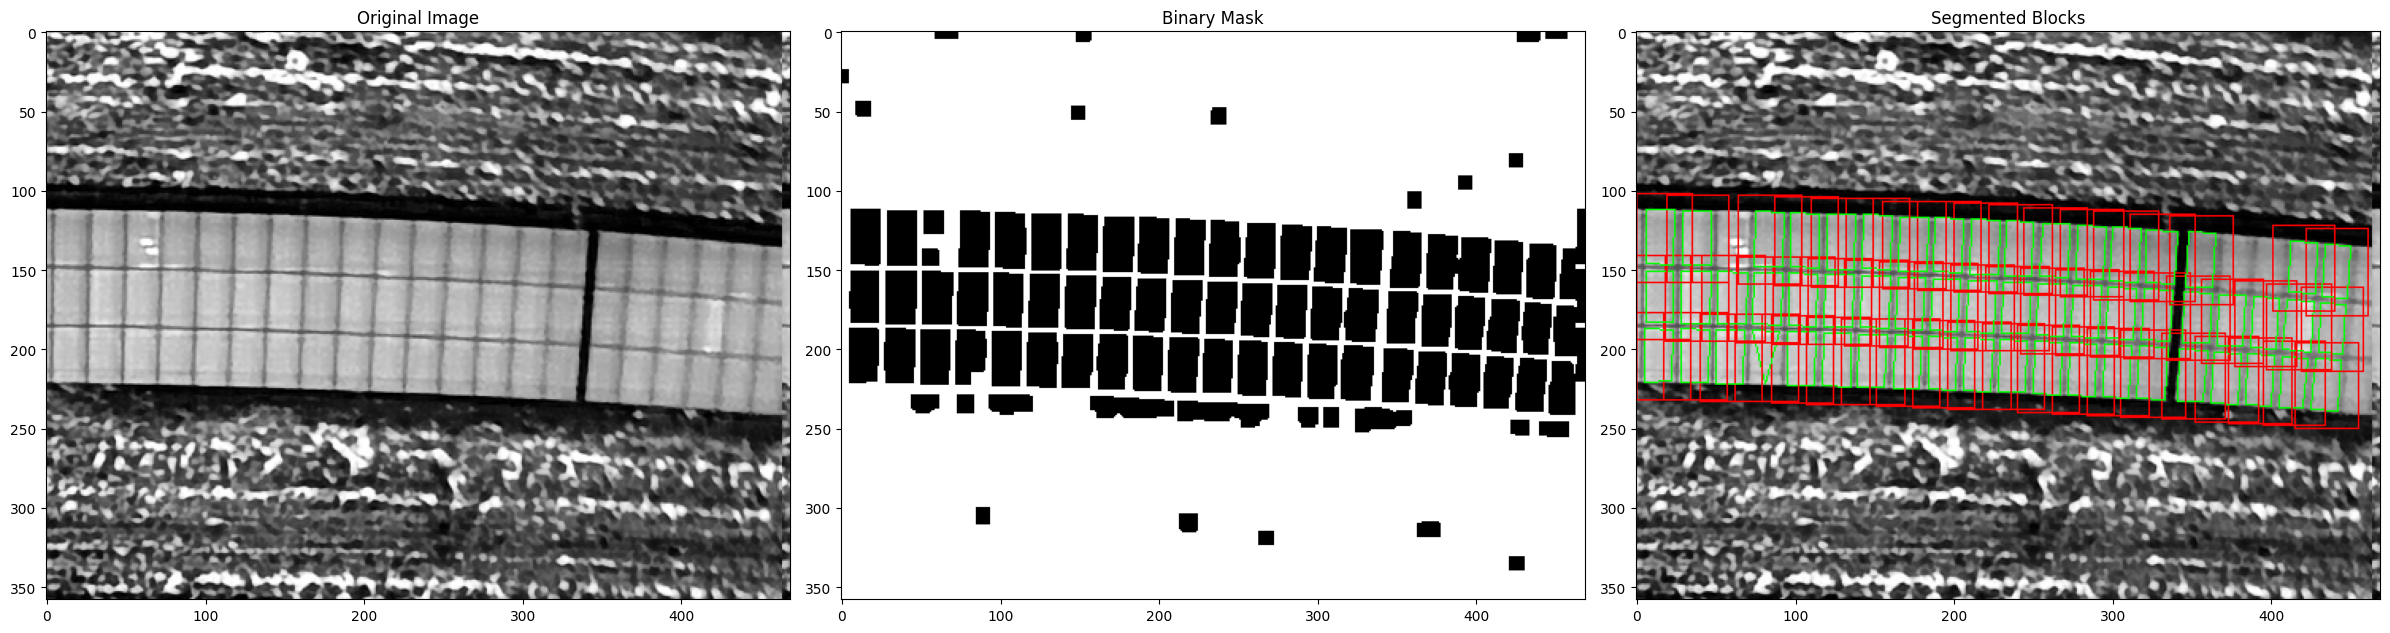

In [152]:
#invert edges
inv_edges = cv2.bitwise_not(closed)
# Find contours
contours, _ = cv2.findContours(inv_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours[0])

min_area = 450
max_area = 1000
off = 10  # additional area to crop in pix
aspect_ratio_min = .5  # aspect ratio of the bounding box
aspect_ratio_max = 2  # aspect ratio of the bounding box
# Draw contours (bounding boxes) on the _cv
output = gray.copy()
# convert output to RGB
output = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)


i = 0
for contour in contours:
    # Filter based on area to ignore noise
    area = cv2.contourArea(contour)
    if area > min_area and area < max_area:
        # draw bounding box in red
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w)/h
        if aspect_ratio > aspect_ratio_min and aspect_ratio < aspect_ratio_max:
            y0, y1 = max(0, y-off), min(y+h+off, gray.shape[0])
            x0, x1 = max(0, x-off), min(x+w+off, gray.shape[1])
            cv2.rectangle(output, (x0, y0), (x1, y1), (0, 0, 255), 1)        
            
            # draw polygon too
            epsilon = 0.1*cv2.arcLength(contour,True)
            approx = cv2.approxPolyDP(contour,epsilon,True)
            cv2.drawContours(output, [approx], 0, (0, 255, 0), 1)
            
            roi = gray[y0:y1, x0:x1]
            cv2.imwrite(f"crop/{i}.png", roi)
            i += 1
      
# Plot the results
plt.figure(figsize=(24, 12))
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title("Binary Mask")
plt.imshow(closed, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Inverted Edges")
plt.imshow(inv_edges, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()